In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

%matplotlib inline

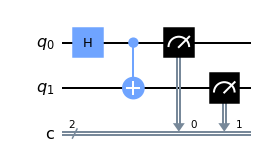

In [2]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cnot(0, 1)

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')

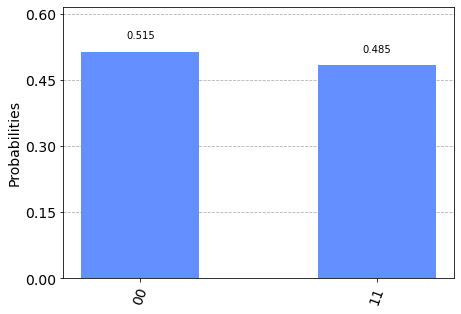

In [3]:
sim = Aer.get_backend('qasm_simulator')
job = assemble(qc)
result = sim.run(job).result()
plot_histogram(result.get_counts())

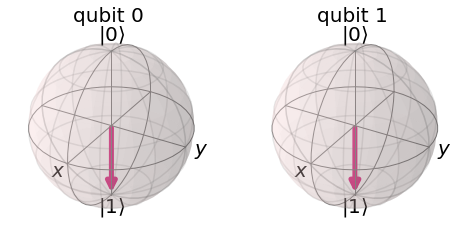

In [4]:
sim = Aer.get_backend('statevector_simulator')
job = assemble(qc)
result = sim.run(job).result()
final_state = result.get_statevector(0)    
plot_bloch_multivector(final_state)

ibmqfactory.load_account:WARNING:2021-04-16 12:18:27,907: Credentials are already in use. The existing account in the session will be replaced.
<ipython-input-7-4b5c0ff52780>:20: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  result = qpu.run(assemble(qc)).result()


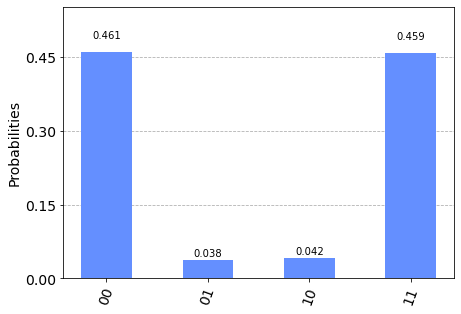

In [7]:
from math import pi
from qiskit import IBMQ
IBMQ.save_account("__IBM_TOKEN__", overwrite=True)

qc = QuantumCircuit(2, 2)

# real IBM computers do not support pure H gate
# we replace it with RZ+SX+RZ because it's basically the same in our case
qc.rz(pi/2, 0)
qc.sx(0)
qc.rz(pi/2, 0)

qc.cnot(0, 1)

qc.measure(0, 0)
qc.measure(1, 1)

provider = IBMQ.load_account()
qpu = provider.get_backend("ibmq_quito")
result = qpu.run(assemble(qc)).result()
plot_histogram(result.get_counts())

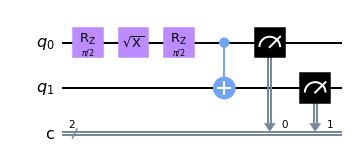

In [8]:
qc.draw(output='mpl')